# 비지도 학습 
* 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야하는 모든 종류의 머신러닝
* 학습 알고리즘은 입력 데이터 만으로 데이터에서 지식을 추출할 수 있어야한다.

#  비지도 학습의 종류
* 비지도 변환 - 데이터를 새롭게 표현해 사람이나 다른 머신러닝 알고리즘이 원래 데이터 보다 쉽게 해석할 수잇도록 만드는 알고리즘

* 군집 알고리즘 - 데이터를 비슷한 것끼리 그룹으로 묶는 것

In [35]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

In [36]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [37]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

# 비지도 변환

## 데이터 전처리와 스케일링

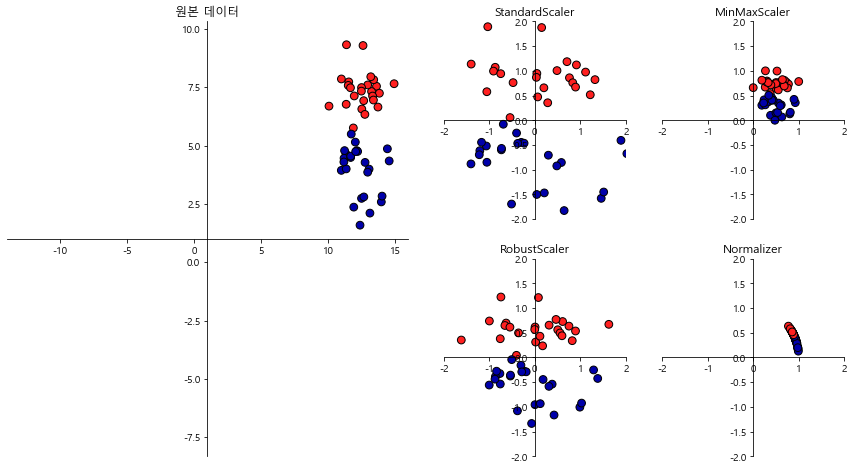

In [38]:
mglearn.plots.plot_scaling()

## 스케일링의 이유
* 변수의 크기가 넘 작거나, 너무 컷을때 해당 변수가 Target에 미치는 영량력이 제대로 표현되지 않을 수 있다.

* sklearn의 대표적 스케일링 함수는 특정 변수의 최대, 최소값으로 조정하는 min_max scaling 이있다.

# 유방암 데이터 적재하여 테스트/훈련셋 나누기

In [39]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_df = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)

In [40]:
print('feature 들의 최소값')
print(cancer_df.min())
print('\n feature 들의 최대 값')
print(cancer_df.max())

feature 들의 최소값
mean radius                6.98e+00
mean texture               9.71e+00
mean perimeter             4.38e+01
mean area                  1.44e+02
mean smoothness            5.26e-02
mean compactness           1.94e-02
mean concavity             0.00e+00
mean concave points        0.00e+00
mean symmetry              1.06e-01
mean fractal dimension     5.00e-02
radius error               1.12e-01
texture error              3.60e-01
perimeter error            7.57e-01
area error                 6.80e+00
smoothness error           1.71e-03
compactness error          2.25e-03
concavity error            0.00e+00
concave points error       0.00e+00
symmetry error             7.88e-03
fractal dimension error    8.95e-04
worst radius               7.93e+00
worst texture              1.20e+01
worst perimeter            5.04e+01
worst area                 1.85e+02
worst smoothness           7.12e-02
worst compactness          2.73e-02
worst concavity            0.00e+00
worst concave

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state = 1)

In [42]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


## MinMax Scaler 를 이용해 전처리 후 속성값 확인

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train.shape

(426, 30)

In [44]:
X_train_scaled = scaler.transform(X_train)
print('변환된 후 크기 :{}'.format(X_train_scaled.shape))

print('스케일 조정 전 특성별 최소값:\n {}'.format(X_train.min(axis = 0)))
print('스케일 조정 전 특성별 최대값:\n {}'.format(X_train.max(axis = 0)))
print('스케일 조정 후 특성별 최소값:\n {}'.format(X_train_scaled.min(axis = 0)))
print('스케일 조정 후 특성별 최대값:\n {}'.format(X_train_scaled.max(axis = 0)))

변환된 후 크기 :(426, 30)
스케일 조정 전 특성별 최소값:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


* minmaxscaler 이므로 최소와 최댓값 0,1 로 변환
* 데이터의 배열 크기는 월래 데이터와 동일
* 데이터 스케일 핏팅은 트레인 데이터로 하는게 국룰이다.

## 데이터 변환 적용해보기

In [45]:
X_test_scaled = scaler.transform(X_test)
print('스케일 조정 후 특성별 최소값:\n {}'.format(X_test_scaled.min(axis = 0)))
print('스케일 조정 후 특성별 최대값:\n {}'.format(X_test_scaled.max(axis = 0)))

스케일 조정 후 특성별 최소값:
 [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최대값:
 [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


## 유방암 데이터셋: 데이터 전처리 하기 전의 성능 

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state = 0)


In [48]:
svm = SVC(C = 100)
svm.fit(X_train,y_train)
print('훈련 셋 정확도 :{:.2f}'.format(svm.score(X_train,y_train)))
print('테스트 셋 정확도 :{:.2f}'.format(svm.score(X_test,y_test)))

훈련 셋 정확도 :1.00
테스트 셋 정확도 :0.63


## 데이터 전처리 성능 측정 -MinMaxScaler(유방암)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
print('훈련 셋 정확도 :{:.2f}'.format(svm.score(X_train_scaled,y_train)))
print('테스트 셋 정확도 :{:.2f}'.format(svm.score(X_test_scaled,y_test)))

훈련 셋 정확도 :0.99
테스트 셋 정확도 :0.97


# Standard Scaling
* z-score 라고 하는 데이터를 통계적으로 표준정규분포화 시켜 스케일링 하는 방식
* 데이터의 평균이 0, 표준편차가 1이되도록 하는 스케일링이다.

## 데이터 전처리 성능 측정 -StandardScaler 사용

In [50]:
print('feature 들의 평균값')
print(cancer_df.mean())
print('\nfeature 들의 분산값')
print(cancer_df.var())

feature 들의 평균값
mean radius                1.41e+01
mean texture               1.93e+01
mean perimeter             9.20e+01
mean area                  6.55e+02
mean smoothness            9.64e-02
mean compactness           1.04e-01
mean concavity             8.88e-02
mean concave points        4.89e-02
mean symmetry              1.81e-01
mean fractal dimension     6.28e-02
radius error               4.05e-01
texture error              1.22e+00
perimeter error            2.87e+00
area error                 4.03e+01
smoothness error           7.04e-03
compactness error          2.55e-02
concavity error            3.19e-02
concave points error       1.18e-02
symmetry error             2.05e-02
fractal dimension error    3.79e-03
worst radius               1.63e+01
worst texture              2.57e+01
worst perimeter            1.07e+02
worst area                 8.81e+02
worst smoothness           1.32e-01
worst compactness          2.54e-01
worst concavity            2.72e-01
worst concave

## 데이터 전처리 성능 측정 -StandardScaler(유방암)


In [51]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler.fit(X_train)
X_train_scaled_standard = standard_scaler.transform(X_train)
X_test_scaled_standard = standard_scaler.transform(X_test)


svm.fit(X_train_scaled_standard, y_train)
print('훈련 셋 정확도 :{:.2f}'.format(svm.score(X_train_scaled_standard,y_train)))
print('테스트 셋 정확도 :{:.2f}'.format(svm.score(X_test_scaled_standard,y_test)))

훈련 셋 정확도 :1.00
테스트 셋 정확도 :0.96


* 성능 측정 시, 스케일의 조정의 효과가 엄청 크다

# 비지도 변환(unsupervised transformation)

## 차원 축소를 해야하는 이유
* 저차원에서 일어나지 않는 현상이 고차원에서 데이터를 분석한거나 다룰때 생겨나는 현상
* 고차원으로 갈수록 공간의 크기가 증가하고, 데이터는 해당공간에 한정적으로 위치
* 빈 공간이 많아지기 떄문에 데이터 차원이 너무 큰 경우 필요없는 특성을 제거하여 차원을 축소해야할 필요가 있다.

## 비지도 변환 차원 축소 - 주성분 분석(PCA)
* 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술이 주성분 분석
* 회전한 뒤, 데이터를 설명하는데 얼마나 중요하냐에 따라 새로운 특성중 일부만 선택되기도 한다.

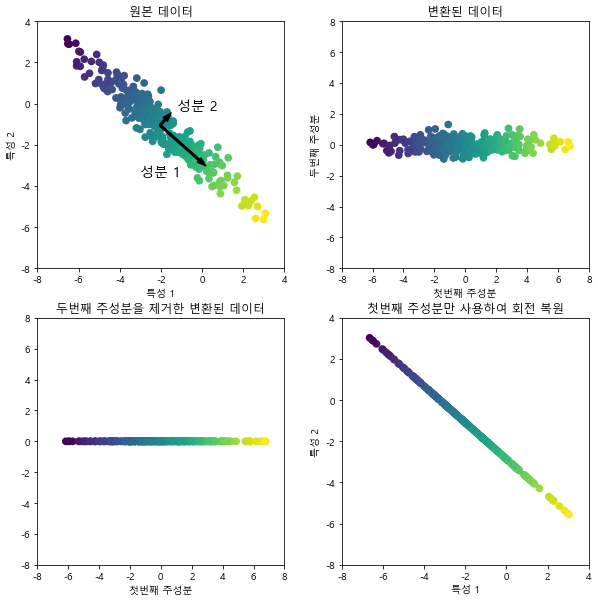

In [52]:
mglearn.plots.plot_pca_illustration()

### PCA를 적용해 유방암 데이터셋 시각화 해보기 

* 특성이 너무 많아 산점도를 그리기 어렵기 때문에, 우선 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그려보자
* 각 특성에 대한 히스토그램으로 특정 간격(bin)에 얼마나 많은 데이터 포인트가 나타는지 횟수를 센것이다.

### 유방암 데이터셋 고유특성별 히스토그램

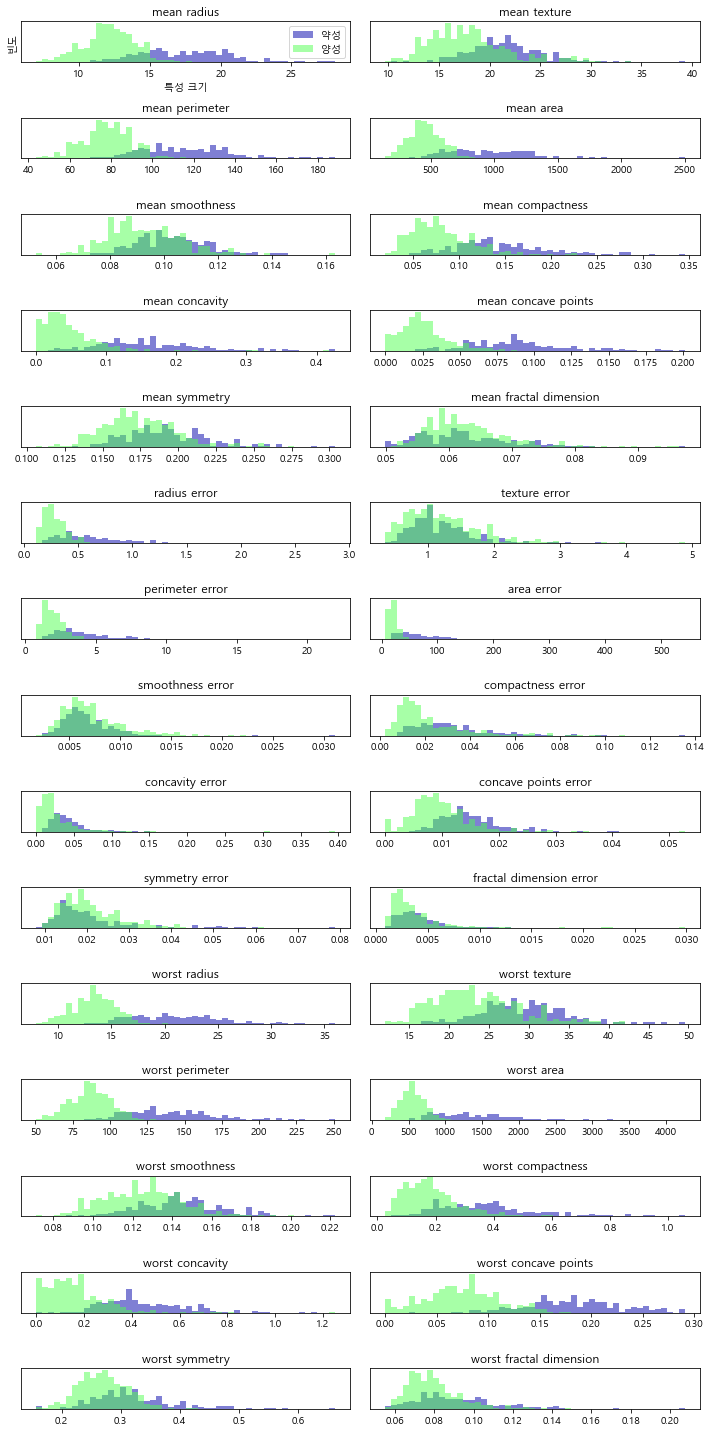

In [54]:
fig, axes = plt.subplots(15,2, figsize = (10,20))
maligrant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(maligrant[:,i], bins = bins, color = mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(['약성', '양성'], loc = 'best')
fig.tight_layout()

* smoothness error 와 같은 특성은 양성,악성 히스토그램이 거의 겹쳐져 결론 도출에 도움이 거의 안되는 특성이라 볼수있다.
* worst concave poins와같은 특성은 확실히 구분되어 매우 유용하다. 
* 하지만 이 그래프도 특성 간의 상호작용이나, 이 상호작용이 클래스와 어떤 관련이 있는지 전혀 알려주지 못하기 때문에
* PCA를 이용해 주요 상호작용을 찾아내어 더 나은 그림을 그려보는 것이다!

### PCA 적용하기 

* 적용 전, StandardScaler 를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일 조정

In [55]:
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [57]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 2)
# 데이터의 처음 두개의 주성분만 유지시키겠다.
# pca에서 알아서 두 주성분(가장 영향이 큰)을 가져와준다.

pca.fit(X_scaled)
#유방암 데이터로 pca 모델을 만들겠다.

X_pca = pca.transform(X_scaled)

print('원본 형태 :', str(X_scaled.shape))
print('축소 형태 :', str(X_pca.shape))

원본 형태 : (569, 30)
축소 형태 : (569, 2)


* 맨 처음 두개의 주성분으로 fit한 데이터를 이용해 그리기

Text(0, 0.5, '두 번째 주성분')

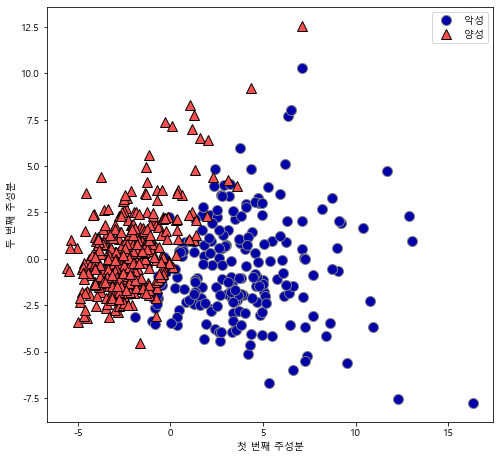

In [66]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1], cancer.target)
plt.legend(['악성', '양성'], loc ='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')

In [68]:
print('pca 주성분 shape:{}'.format(pca.components_.shape))

pca 주성분 shape:(2, 30)


In [69]:
print('pca 주성분 : {}'.format(pca.components_))

pca 주성분 : [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


* PCA는 비지도 학습이므로, 회전 축을 찾을때 어떤 클래스 정보도 사용하지 않는다.
* 단순히 데이터에 있는 상관관계만을 고려하여, 추출한 성분과 클래스의 정보간의 관계를 시각화 할 수 있다.

Text(0, 0.5, '주성분')

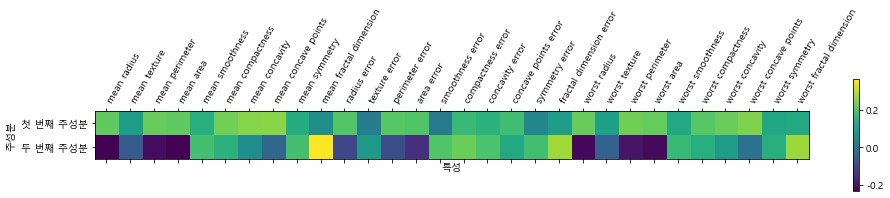

In [71]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1],["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel('특성')
plt.ylabel('주성분')

* PCA의 단점은 그래프의 축을 해석하기가 쉽지 않다. 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다. 
* 위의 히트맵으로 보아할때, 첫번째 주성분은 모든 특성사이에 공통의 상호관계가 있지만, 두번째 주성분은 부호가 섞어여 있어 축이 가지는 의미를 파악하기 힘들 수 있다.

# 고유얼굴(eigenface) 특성 추출 - PCA _따로 해보기 교본202~224

# 군집
* 주어진 데이터들의 특성을 고려해, 데이터 클러스터를 정의하고, 클러스터를 대표할 수 있는 대표점을 찾는 비지도 학습의 대표적 알고리즘
* 데이터 셋을 클러스터라는 그룹으로 나눈다.
* k_평균(k_mean) 군집 - 가장 간단하고 널리 사용되는 군집 알고리즘

* 군집화는 고객, 마켓, 브랜드, 사회 경제활동 세분화 등과 같은 분야에서 활용된다.

## k평균 군집(k-mean)

* 각 데이터 포인트 i에 가장가까운 중심점을 찾고, 그 중심점에 해당하는 클러스터 할당 - 유클리드 거리 사용

* 할당된 클러스터를 기반으로 새로운 중심점 계산
* 각클러스터의 할당이 변경되지 않을때 까지 반복

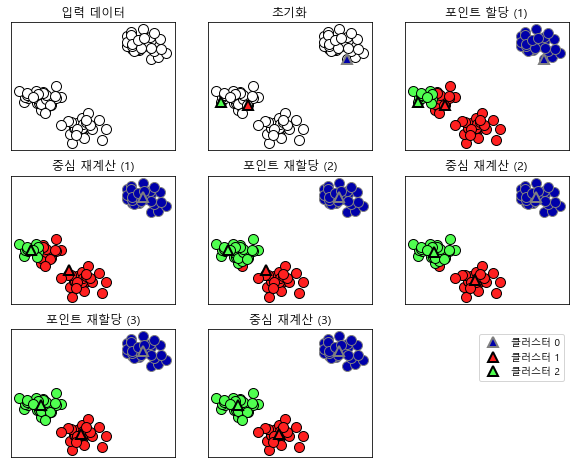

In [76]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

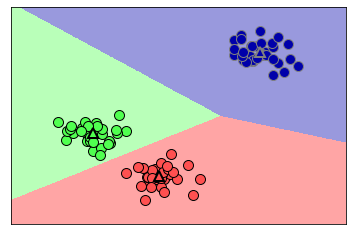

In [78]:
import mglearn
mglearn.plots.plot_kmeans_boundaries()

## scikit_learn의 make_blobs로 kmean 활용

In [85]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state = 1)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
print('클러스터 레이블 :\n {}'.format(kmeans.labels_))

클러스터 레이블 :
 [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


* 세개의 클러스터를 지정했으므로 각 클러스터는 0에서 2까지의 번호가 붙는다.

In [90]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


* 또한 predict 메서드를 이용해 새로운 데이터 클러스터 레이블을 예측할 수 있다. 
* 훈련셋에 대해 predict 메서드를 실행하면 당연히 labels_와 같은 결과를 얻는다.

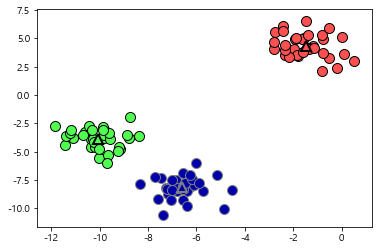

In [92]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],[0,1,2],
    markers ='^', markeredgewidth = 2)

* 2,5개의 클러스터(군집) 표현시

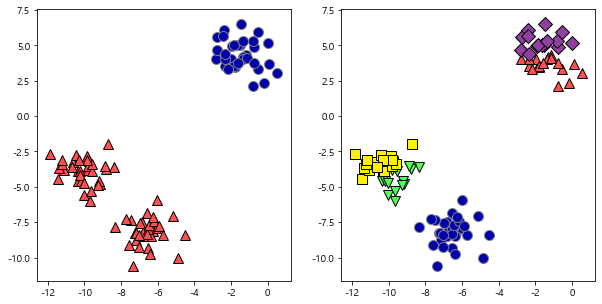

In [94]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1], assignments, ax = axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1], assignments, ax = axes[1])

* 하지만 각클러스터의 형태가 원형이 아닐경우 쉽게 구분되지 않는다. 
* k-평균은 모든 클러스터의 반경이 똑같다고 가정하기 때문에 클러스터 중심 사이의 정확히 중간에 경계를 그리기 때문